# Regresión logística

In [3]:
import os.path
os.chdir('c:\\Users\\aesca\\Documents\\TEC\\Académico\\7mo semestre\\Reto_Titanic_TC3006C\\')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load train data using os path
# train = pd.read_csv('./data/train_clean.csv')
train = pd.read_csv('./data/train/train_clean.csv')
# Load test data
test = pd.read_csv('./data/test/test_clean.csv')

# Drop the columns that are not needed in the train dataset
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Drop the columns that are not needed in the test dataset
x_test = test.drop('Survived', axis=1)
y_test = test['Survived']

# # Drop 'Age' column
# x_train = x_train.drop('Age', axis=1)
# x_test = x_test.drop('Age', axis=1)

# Drop 'PassengerId' column
x_train = x_train.drop('PassengerId', axis=1)
x_test = x_test.drop('PassengerId', axis=1)

# Print cols of each train and test dataset
print(x_train.columns)
if len(x_train.columns) == len(x_test.columns):
    print('✓ Ambos datasets tienen la misma cantidad de columnas')


Index(['Age', 'Fare', 'Embarked_Cherbourg', 'Embarked_Queenstown',
       'Embarked_Southampton', 'Alone', 'Large', 'Medium', 'Small', 'Female',
       'Male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FemaleAge2', 'MaleAge6'],
      dtype='object')
✓ Ambos datasets tienen la misma cantidad de columnas


In [4]:
# Realizar la división (80% para entrenamiento y 20% para prueba)
X_train, X_validation, Y_train, Y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Use GridSearchCV to find best parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1., 10.],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', solver='liblinear'), param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, Y_train)
print(f'Best parameters: {grid_search.best_params_}')

# Print True Positive, False Positive, True Negative, False Negative as variables
y_pred = grid_search.predict(X_train)
confusion_matrix_1 = confusion_matrix(Y_train, y_pred)
print(f'True Positive: {confusion_matrix_1[1][1]}')
print(f'False Positive: {confusion_matrix_1[0][1]}')
print(f'True Negative: {confusion_matrix_1[0][0]}')
print(f'False Negative: {confusion_matrix_1[1][0]}')
print(f'Precision: {(precision_score(Y_train, y_pred).round(2))*100}%')
print(f'Accuracy: {(accuracy_score(Y_train, y_pred).round(2))*100}%')
print(f'Recall: {(confusion_matrix_1[1][1]/(confusion_matrix_1[1][1]+confusion_matrix_1[1][0])).round(2)*100}%')

# Delete variable y_pred
del y_pred

Best parameters: {'C': 1.0, 'penalty': 'l1'}
True Positive: 207
False Positive: 63
True Negative: 377
False Negative: 64
Precision: 77.0%
Accuracy: 82.0%
Recall: 76.0%


Precision: 71.0%
Accuracy: 81.0%
Recall: 87.0%
True Positive: 60
False Positive: 25
True Negative: 84
False Negative: 9


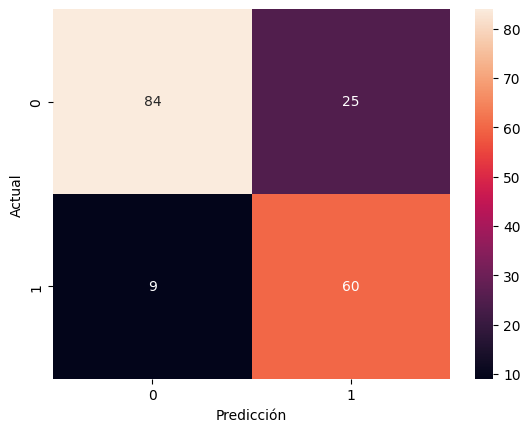

In [6]:
# Predict with best parameters
y_pred_test = grid_search.predict(X_validation)
precision = grid_search.score(X_validation, Y_validation)
print(f'Precision: {precision.round(2)*100}%')
accuracy = accuracy_score(Y_validation, y_pred_test)
print(f'Accuracy: {accuracy.round(2)*100}%')
recall = (confusion_matrix(Y_validation, y_pred_test)[1][1]/(confusion_matrix(Y_validation, y_pred_test)[1][1]+confusion_matrix(Y_validation, y_pred_test)[1][0])).round(2)*100
print(f'Recall: {recall}%')


# Confusion Matrix plot
confusion_matrix_2 = confusion_matrix(Y_validation, y_pred_test)

print(f'True Positive: {confusion_matrix_2[1][1]}')
print(f'False Positive: {confusion_matrix_2[0][1]}')
print(f'True Negative: {confusion_matrix_2[0][0]}')
print(f'False Negative: {confusion_matrix_2[1][0]}')

# Plot the confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

In [7]:
# Print model coefficients and the variable names to see which variables are important
coef = grid_search.best_estimator_.coef_
cols = x_train.columns
# Combine the two arrays into a dataframe
coef_df = pd.DataFrame(coef, columns=cols)
coef_df

,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male,Pclass_1,Pclass_2,Pclass_3,FemaleAge2,MaleAge6
0,-0.026224,0.003403,0.107423,0.0,-0.353895,0.930177,-1.368464,-1.648504,0.953607,2.062932,-0.742126,0.985321,0.0,-0.795068,0.0,2.318683


In [8]:
# # Fill a model predict with a male with an age of 25 that paid 100 for the ticket, traveled in Pclass 1 and embarked from Cherbourg, it should have 9 features
# print(grid_search.predict([[3, 32, 56, 0, 0, 1, 1, 0, 0, 0, 0, 1]]))

In [9]:
# # Pclass = 1, male check if survived in train
# variable = train[(train['Male'] == 1)&(train['Survived'] == 1)&(train['Pclass'] == 3) & (train['Alone'] == 1)]
# print(len(variable))
# variable

In [10]:
# Run section only if 'titanic_tree.pdf' is not in the directory

if not os.path.exists('titanic_tree.pdf'):
    # Decision Tree Clasiifier with graphviz
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import export_graphviz
    import graphviz

    # Create a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(x_train, y_train)

    # Plot the tree with graphviz
    dot_data = export_graphviz(clf, out_file=None, feature_names=x_train.columns, class_names=['Died', 'Survived'], filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render('titanic_tree')
    graph.view()

In [11]:
import joblib

# Save the model
joblib.dump(grid_search, 'logistic_regression.pkl')

['logistic_regression.pkl']